In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
ames_data = pd.read_csv('./datasets/train.csv')

In [4]:
import missingno as msno

In [6]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
ames_data['MS Zoning'].value_counts()
#This data point will not tell me much about the data since it is majority Residential Low Density and therefore 
#won't help when determining the sales price of properities

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [8]:
ames_data['MS SubClass'].value_counts()
#Most of the houses are 1 - story 1946 and Newer, the next highest is 2-story and newer, then it is 1-1/2 story of all
#ages

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

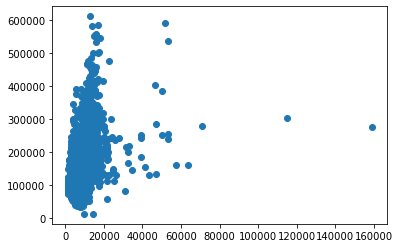

In [15]:
import matplotlib.pyplot as plt
plt.scatter(ames_data['Lot Area'], ames_data['SalePrice'])

In [16]:
ames_data['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [19]:
ames_data['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [20]:
ames_data['Full Bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

In [21]:
ames_data['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [24]:
ames_data['Bedroom AbvGr'].value_counts()
#Should I get rid of the properities with no bedrooms listed since these are probably not houses?

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

In [26]:
import seaborn as sns

In [37]:
# Dropping Pool QC and Misc Features columns in the data frame because they have a large portion of null values
#and this will not be as helpful when creating the model

ames_data.drop(columns = ['Misc Feature'], inplace = True)

,SalePrice
Id,-0.051398
PID,-0.255052
MS SubClass,-0.087335
Lot Frontage,0.341842
Lot Area,0.296566
Overall Qual,0.800207
Overall Cond,-0.097019
Year Built,0.571849
Year Remod/Add,0.550370
Mas Vnr Area,0.512230


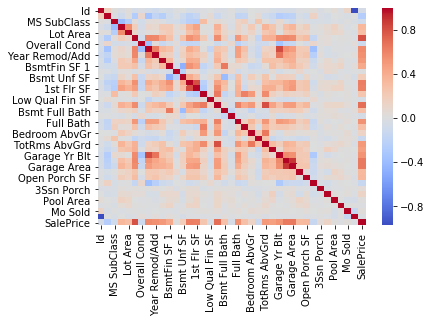

<Figure size 14400x7200 with 0 Axes>

In [48]:


import matplotlib.pyplot as plt
sns.heatmap(ames_data.corr(), cmap = 'coolwarm')
plt.figure(figsize=(200,100))

ames_data.corr()[['SalePrice']]

In [ ]:
#Lot Frontage, Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Bsmt Fin SF1, Total Bsmt SF, 
#1st Flr SF, Gr Liv Area, Full Bath, TotRms AbvGrd, Fireplaces, Garage YR Built, Garage Cars, Garage Area

#All the variables listed above have a correaltion of .40 or above in relation to sale price. 